In [1]:
libraries<-c("DESeq2","ggplot2","viridis","RColorBrewer","pheatmap","edgeR","ggfortify","factoextra")
suppressPackageStartupMessages(lapply(libraries, require, character.only = TRUE))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

In [2]:
countData <- read.csv("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/04_featureCounts/Lbraziliensis_counts_cleaned.txt",
                      sep = '\t',row.names=1)

In [3]:
countData

,Chr,Start,End,Strand,Length,SRR2767683,SRR7945367,SRR7945368,SRR7945369,SRR7945370,⋯,SRR7945393,SRR7945394,SRR7945395,SRR7945396,SRR7945397,SRR7945398,SRR7945399,SRR7945400,SRR7945401,SRR7945402
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LbrM.10.1540.1,LbrM.00_0_0-6518,833,1588,+,756,295,508,445,386,389,⋯,413,427,281,280,345,285,309,344,357,376
ncRNA00001,LbrM.00_0_0-6518,2110,2130,+,21,70,39,28,28,20,⋯,48,53,41,51,23,27,16,24,8,25
LbrM.10.1550.1,LbrM.00_0_0-6518,2149,3828,+,1680,354,1025,951,882,839,⋯,1096,1263,836,850,855,844,756,696,699,768
ncRNA00002,LbrM.00_0_0-6518,4967,4987,+,21,42,4,3,2,0,⋯,2,6,1,1,0,3,3,1,5,0
LbrM.10.1560.1,LbrM.00_0_0-6518,5499,6518,+,1020,118,432,417,385,411,⋯,519,519,347,384,337,396,280,352,282,321
LbrM.10.1570.1,LbrM.00_1_6618-9705,1166,2920,-,1755,218,564,489,469,518,⋯,556,501,356,421,408,398,397,346,378,359
LbrM.10.1580.1,LbrM.00_2_9805-14507,1,1704,+,1704,444,913,881,799,670,⋯,745,739,559,601,613,598,588,612,629,688
LbrM.10.1590.1,LbrM.00_2_9805-14507,2369,4492,+,2124,293,657,657,544,589,⋯,707,797,516,505,479,502,471,439,514,451
LbrM.10.1600.1,LbrM.00_3_14607-16197,145,321,+,177,65,112,113,133,138,⋯,125,122,82,74,94,108,93,105,107,91


In [4]:
samples <- read.delim("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/metadata.txt",
                      header=T)

In [5]:
countData[,1:6] <- NULL

In [6]:
groups<-samples$class

In [7]:
#as.factor(samples$class)

In [8]:
d <- DGEList(counts=countData,group=factor(groups))

In [9]:
# Filter lowly expressed genes
keep <- filterByExpr(d,group = groups,min.prop = 0.5, min.count = 10, min.total.count = 15, large.n = 5)
d <- d[keep, , keep.lib.sizes=FALSE]

In [10]:
d$counts

,SRR7945367,SRR7945368,SRR7945369,SRR7945370,SRR7945371,SRR7945372,SRR7945373,SRR7945374,SRR7945375,SRR7945376,⋯,SRR7945393,SRR7945394,SRR7945395,SRR7945396,SRR7945397,SRR7945398,SRR7945399,SRR7945400,SRR7945401,SRR7945402
LbrM.10.1540.1,508,445,386,389,410,389,255,248,406,427,⋯,413,427,281,280,345,285,309,344,357,376
ncRNA00001,39,28,28,20,27,20,12,5,62,37,⋯,48,53,41,51,23,27,16,24,8,25
LbrM.10.1550.1,1025,951,882,839,882,806,458,498,1140,1105,⋯,1096,1263,836,850,855,844,756,696,699,768
LbrM.10.1560.1,432,417,385,411,445,398,242,213,514,539,⋯,519,519,347,384,337,396,280,352,282,321
LbrM.10.1570.1,564,489,469,518,531,465,376,277,584,493,⋯,556,501,356,421,408,398,397,346,378,359
LbrM.10.1580.1,913,881,799,670,840,784,510,511,794,792,⋯,745,739,559,601,613,598,588,612,629,688
LbrM.10.1590.1,657,657,544,589,547,531,380,428,732,632,⋯,707,797,516,505,479,502,471,439,514,451
LbrM.10.1600.1,112,113,133,138,110,108,134,140,132,112,⋯,125,122,82,74,94,108,93,105,107,91
ncRNA00300,48,35,62,37,60,55,35,61,49,34,⋯,61,52,34,35,46,27,28,48,42,34
LbrM.10.1610.1,1483,1507,1257,1221,1216,1222,850,964,1841,1699,⋯,1695,1827,1344,1355,1238,1444,966,947,979,949


In [11]:
dim(d)
#head(d$counts)
d.full <- d # keep the old one in case we mess up
#head(d$counts)
dim(d)
d$samples$lib.size <- colSums(d$counts)
d_cpm <- calcNormFactors(d,method = "none")
cpms<-cpm(d_cpm, log=FALSE,normalized.lib.sizes = T)
cmpl<-cpm(d_cpm,log = T,normalized.lib.sizes = T)


d_TMM <- calcNormFactors(d, method="TMM")

# Calculate the cpm with the TMM normalized library
TMM <- cpm(d_TMM, log = FALSE, normalized.lib.sizes=TRUE)
tmm_log<-log(1+TMM)

[1] 13872    36

[1] 13872    36

In [12]:
write.table(cpms,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/normCounts_cpm.tsv",sep = '\t',quote = F)
write.table(cmpl,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/normCounts_cpm_log.tsv",sep = '\t',quote = F)
write.table(TMM,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/normCounts_tmm.tsv",sep = '\t',quote = F)
write.table(tmm_log,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/normCounts_tmm_log.tsv",sep = '\t',quote = F)

In [13]:
# Normalize the data
d <- calcNormFactors(d)

In [14]:
#Create a design matrix to specify the model.
design <- model.matrix(~ 0 + groups)  # No intercept, group levels as factorscolnames(design) <- levels(groups)
colnames(design) <- levels(as.factor(groups))

In [15]:
# Estimate dispertion
y <- estimateDisp(d, design)

In [16]:
y

,SRR7945367,SRR7945368,SRR7945369,SRR7945370,SRR7945371,SRR7945372,SRR7945373,SRR7945374,SRR7945375,SRR7945376,⋯,SRR7945393,SRR7945394,SRR7945395,SRR7945396,SRR7945397,SRR7945398,SRR7945399,SRR7945400,SRR7945401,SRR7945402
LbrM.10.1540.1,508,445,386,389,410,389,255,248,406,427,⋯,413,427,281,280,345,285,309,344,357,376
ncRNA00001,39,28,28,20,27,20,12,5,62,37,⋯,48,53,41,51,23,27,16,24,8,25
LbrM.10.1550.1,1025,951,882,839,882,806,458,498,1140,1105,⋯,1096,1263,836,850,855,844,756,696,699,768
LbrM.10.1560.1,432,417,385,411,445,398,242,213,514,539,⋯,519,519,347,384,337,396,280,352,282,321
LbrM.10.1570.1,564,489,469,518,531,465,376,277,584,493,⋯,556,501,356,421,408,398,397,346,378,359
LbrM.10.1580.1,913,881,799,670,840,784,510,511,794,792,⋯,745,739,559,601,613,598,588,612,629,688
LbrM.10.1590.1,657,657,544,589,547,531,380,428,732,632,⋯,707,797,516,505,479,502,471,439,514,451
LbrM.10.1600.1,112,113,133,138,110,108,134,140,132,112,⋯,125,122,82,74,94,108,93,105,107,91
ncRNA00300,48,35,62,37,60,55,35,61,49,34,⋯,61,52,34,35,46,27,28,48,42,34
LbrM.10.1610.1,1483,1507,1257,1221,1216,1222,850,964,1841,1699,⋯,1695,1827,1344,1355,1238,1444,966,947,979,949


In [17]:
# Fit the model
fit <- glmQLFit(y, design)

In [18]:
contrast2 <- makeContrasts(amastigote_vs_procyclic_promastigote  = amastigote - procyclic_promastigote, levels = design)
qlf2 <- glmQLFTest(fit, contrast = contrast2)
top2 <- topTags(qlf2, n = Inf)


In [19]:
contrast3 <- makeContrasts(amastigote_vs_hpi_metacyclic_promastigote = amastigote - metacyclic_promastigote, levels = design)
qlf3 <- glmQLFTest(fit, contrast = contrast3)
top3 <- topTags(qlf3, n = Inf)


In [20]:
contrast4 <- makeContrasts(metacyclic_promastigote_vs_procyclic_promastigote = metacyclic_promastigote - procyclic_promastigote, levels = design)
qlf4 <- glmQLFTest(fit, contrast = contrast4)
top4 <- topTags(qlf4, n = Inf)


In [21]:
# Save the results to a TSV file
write.table(as.data.frame(top2), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/AMAvsPRO_EdgeR.tsv", sep = "\t", quote = FALSE, row.names = TRUE)
write.table(as.data.frame(top3), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/AMAvsMETA_EdgeR.tsv", sep = "\t", quote = FALSE, row.names = TRUE)
write.table(as.data.frame(top4), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/METAvsPRO_EdgeR.tsv", sep = "\t", quote = FALSE, row.names = TRUE)


In [22]:
DE_list_AMAvsPRO <- subset(top2$table, FDR < 0.05 & logFC>= 1 | FDR < 0.05 & logFC <= -1)
DE_list_AMAvsMETA <- subset(top3$table, FDR < 0.05 & logFC>= 1 | FDR < 0.05 & logFC <= -1)
DE_list_METAvsPRO <- subset(top4$table, FDR < 0.05 & logFC>= 1 | FDR < 0.05 & logFC <= -1)


In [23]:
# Save the results to a TSV file
write.table(as.data.frame(DE_list_AMAvsPRO), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/AMAvsPRO_filtered_EdgeR.tsv", sep = "\t", quote = FALSE, row.names = TRUE)
write.table(as.data.frame(DE_list_AMAvsMETA), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/AMAvsMETA_filtered_EdgeR.tsv", sep = "\t", quote = FALSE, row.names = TRUE)
write.table(as.data.frame(DE_list_METAvsPRO), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/METAvsPRO_filtered_EdgeR.tsv", sep = "\t", quote = FALSE, row.names = TRUE)


In [24]:
dds <- DESeqDataSetFromMatrix(countData = d$counts, colData = samples, design = ~ class)
dds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 13872 36 
metadata(1): version
assays(1): counts
rownames(13872): LbrM.10.1540.1 ncRNA00001 ... ncRNA20191 LbrM.35.7400
rowData names(0):
colnames(36): SRR7945367 SRR7945368 ... SRR7945401 SRR7945402
colData names(2): sample class

In [25]:
dds <- dds[rowSums(counts(dds)) > 1, ]

In [26]:
dds <- DESeq(dds,parallel = TRUE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 30 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 30 workers



In [27]:
#make contrast
res2 <- results(dds, contrast = c("class", "amastigote", "procyclic_promastigote"))
res3 <- results(dds, contrast = c("class", "amastigote", "metacyclic_promastigote"))
res4 <- results(dds, contrast = c("class", "metacyclic_promastigote", "procyclic_promastigote"))


In [28]:
# Save the results to a TSV file
write.table(as.data.frame(res2), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/AMAvsPRO_DESeq.tsv", sep = "\t", quote = FALSE, row.names = TRUE)
write.table(as.data.frame(res3), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/AMAvsMETA_DESeq.tsv", sep = "\t", quote = FALSE, row.names = TRUE)
write.table(as.data.frame(res4), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/METAvsPRO_DESeq.tsv", sep = "\t", quote = FALSE, row.names = TRUE)


In [29]:
DEseq_list_AMAvsPRO <- subset(res2, padj < 0.05 & log2FoldChange>= 1 | padj < 0.05 & log2FoldChange <= -1)
DEseq_list_AMAvsMETA <- subset(res3, padj < 0.05 & log2FoldChange>= 1 | padj < 0.05 & log2FoldChange <= -1)
DEseq_list_METAvsPRO <- subset(res4, padj < 0.05 & log2FoldChange>= 1 | padj < 0.05 & log2FoldChange <= -1)


In [30]:
# Save the results to a TSV file

write.table(as.data.frame(DEseq_list_AMAvsPRO), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/AMAvsPRO_filtered_DESeq.tsv", sep = "\t", quote = FALSE, row.names = TRUE)
write.table(as.data.frame(DEseq_list_AMAvsMETA), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/AMAvsMETA_filtered_DESeq.tsv", sep = "\t", quote = FALSE, row.names = TRUE)
write.table(as.data.frame(DEseq_list_METAvsPRO), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/METAvsPRO_filtered_DESeq.tsv", sep = "\t", quote = FALSE, row.names = TRUE)


In [31]:
normcounts<-as.data.frame(counts(dds,normalized =TRUE))

In [32]:
write.table(normcounts,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/normCounts_DESeq2.tsv",sep = '\t',quote = F)

In [33]:
vsd <- vst(dds, blind = TRUE)

using ntop=500 top features by variance



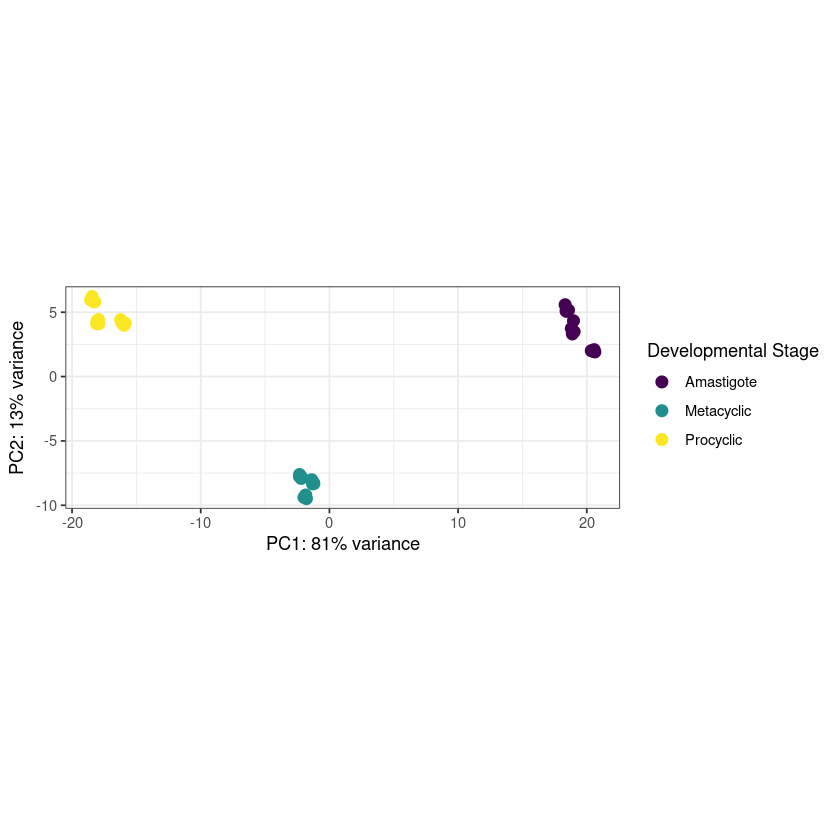

In [34]:
pcaData<-plotPCA(vsd, intgroup=c( "class"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
pcaD<-ggplot(pcaData, aes(PC1, PC2, color=class,linetype=class)) +
  geom_point(size=3)  +
  guides(col=guide_legend("Developmental Stage"))+
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  scale_colour_viridis_d(option = "D",labels=c("amastigote" = "Amastigote",
                                              "procyclic_promastigote" = "Procyclic", 
                                              "metacyclic_promastigote" = "Metacyclic"
                                              ))+
  coord_fixed()+
  theme_bw()
pcaD

In [35]:
ggsave("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/plots/PCAdeseq.pdf",
       pcaD, device="pdf",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

ggsave("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/plots/PCAdeseq.png",
       pcaD, device="png",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

ggsave("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/plots/PCAdeseq.tiff",
       pcaD, device="tiff",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

In [36]:
normalized_counts <- assay(vsd)

In [37]:
ann<-samples
rownames(ann)<-ann$sample
ann$sample<-NULL


In [38]:
ann_colors = list(
  class = c(amastigote="#440154", metacyclic_promastigote="#21918c",procyclic_promastigote="#fde725"))

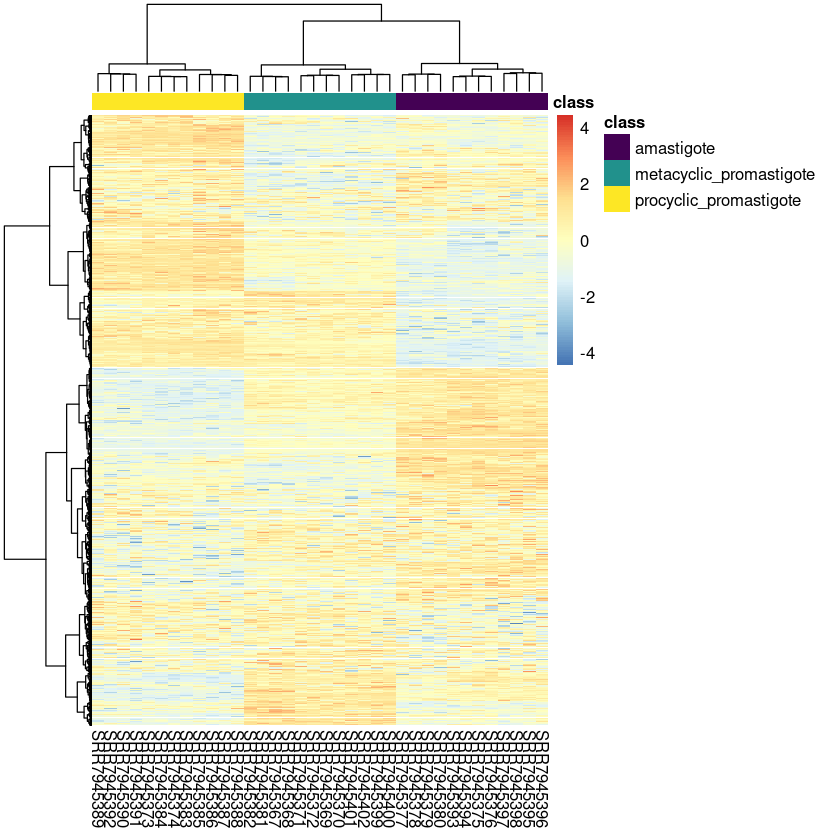

In [39]:
# Define a color palette
colors <- colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(100)

# Generate the heatmap with clustering
distSamples<-pheatmap(normalized_counts, 
         scale = "row", 
         clustering_distance_rows = "euclidean", 
         clustering_distance_cols = "euclidean", 
         clustering_method = "ward.D2", 
         annotation_col = ann,
         annotation_colors=ann_colors,
         color = colors, 
         show_rownames = FALSE, 
         show_colnames = TRUE)


In [40]:
save_pheatmap <- function(x, filename, width=10, height=10, res=300) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   png(filename,width = width, height=height,res = res,units = "in")
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_pdf <- function(x, filename, width=10, height=10) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename,width = width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_tiff <- function(x, filename, width=10, height=10) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   tiff(filename,width = width, height=height,res = 300,units = "in")
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [41]:
save_pheatmap(distSamples, 
              filename="/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/plots/clustering_heatmap.png")
save_pheatmap_pdf(distSamples, 
                  filename="//media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/plots/clustering_heatmap.pdf")
save_pheatmap_tiff(distSamples, 
                   filename="/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lbraziliensis/analysis/05_DEG/plots/clustering_heatmap.tiff")

pdf 
  2

pdf 
  2

pdf 
  2